### PHYS247-Winter 2021: Homework 3 solution

### TA: Amartya Mitra

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
import seaborn as sns
from scipy.spatial import distance
plt.rc('font', family='serif', size='15')
plt.rcParams['figure.figsize']=8,6

### Question1: a)

In [ ]:
def MCMC(log_Posterior,data,initial,step_cov,n_iteration):
    param1=np.array(initial)
    sample=np.array(initial)
    for j in range(n_iteration):
        log_Posterior_i=log_Posterior(data,param1)
        #update the location
        param2=np.random.multivariate_normal(param1,step_cov)
        #find new posterior
        log_Posterior_f=log_Posterior(data,param2)
        # generate a random number between 0 and 1
        rand=np.random.rand()
        if log_Posterior_f-log_Posterior_i>np.log(rand):
            sample=np.vstack((sample,param2))
            param1=param2[:]
        else:
            sample=np.vstack((sample,param1))
    return(sample)  

In [ ]:
data=pd.read_csv('../Homework/tweet_counts.csv')
data.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [ ]:
k=data['count'].values
w=data['week'].values

In [ ]:
Poisson=lambda k,λ : (λ**k)/np.math.factorial(k)*np.exp(-λ)
α=1/np.mean(k)

In [ ]:
def log_posterior(data,param):
    k,w=data
    lamb1,lamb2,W_s=param
    
    P=0
    
    for i in k[w<W_s]:
        P=P+np.log(Poisson(i,lamb1)*α*np.exp(-α*lamb1))

    for j in k[w>=W_s]:
        P=P+np.log(Poisson(j,lamb2)*α*np.exp(-α*lamb2))
        
    return(P)

In [ ]:
D=MCMC(log_posterior,data=[k,w],initial=[20,20,20],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=10000)

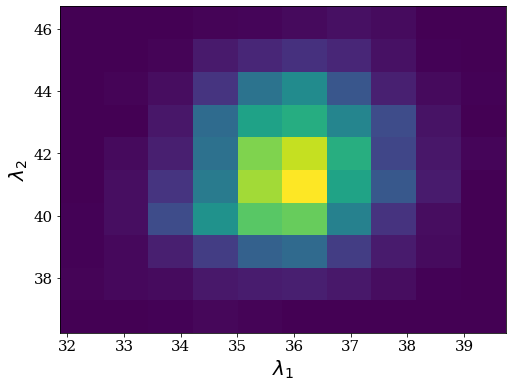

In [ ]:
plt.hist2d(D.T[0][100:],D.T[1][100:])

plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)

plt.show()

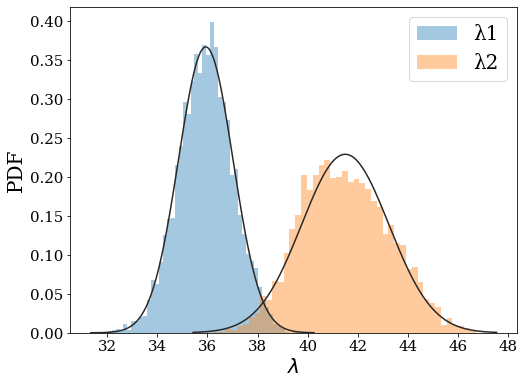

In [ ]:
sns.distplot(D.T[0][100:],fit=norm, kde=False,label='λ1')
sns.distplot(D.T[1][100:],fit=norm, kde=False,label='λ2')

plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("PDF",fontsize=20)

plt.legend(fontsize=20)
plt.show()

### b)

In [ ]:
print('mean(λ1 is)',np.mean(D.T[0][100:]))
print('std(λ1 is)',np.std(D.T[0][100:]))

mean(λ1 is) 35.93378700140596
std(λ1 is) 1.087045525743331


In [ ]:
print('mean(λ2 is)',np.mean(D.T[1][100:]))
print('std(λ2 is)',np.std(D.T[1][100:]))

mean(λ2 is) 41.50242031785111
std(λ2 is) 1.7409648914678517


In [ ]:
print('mean(W_s is)',np.round(np.mean(D.T[2][100:])))

mean(W_s is) 34.0


The posteriors are consistent with those we found in previous homework.

### c)

In [ ]:
λ1=D.T[0][100:]
λ2=D.T[1][100:]

In [ ]:
P=((λ2-λ1)>5).sum()/len(λ1)
print(P)

0.6108473891526108


So, $P[(\lambda_2-\lambda_1)>5]\sim 61\%$.

### Question 2: a,b)

In [ ]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)

Just keep two dimensions of data since we want to do clustring in 2D:

In [ ]:
X=X[:,:2]

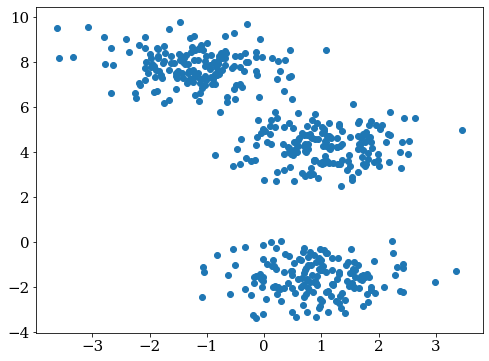

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
def k_means(X,k):
    n_feature=X.shape[1]
    sample_size=X.shape[0]
    # initialize centroids
    centers=np.random.multivariate_normal(np.mean(X,axis=0),np.cov(X.T),k)
    
    error=np.ones((k,n_feature))
    
    while ((error>np.tile(10**-10,(k,n_feature)))).any():
        # find distance of every point from centers
        dist=distance.cdist(X, centers, 'euclidean')
        #Cluster each point with the center nearest to it
        y=np.argmin(dist, axis=1)
        centers_updated=np.zeros((k,n_feature))
        for i in range(k):
            error[i]=centers[i]-np.mean(X[y == i], axis=0)
            centers[i]=np.mean(X[y == i], axis=0)
    #Finding distortion which will be used in elbow curve
    Distortion=0
    for i in range(k):
        Distortion+=np.sum(distance.cdist(X[y == i], centers[i].reshape(1,n_feature), 'euclidean'))**2
    return(y,centers,Distortion) 

In [ ]:
y,centers,Distortion=k_means(X,3)

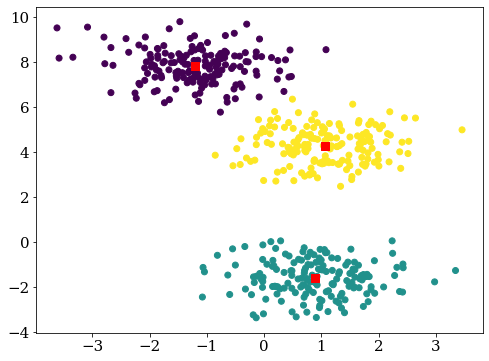

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(centers[:,0],centers[:,1],c='red',marker='s',s=50)

### c,d)

One of the popular methods to determine the number of clusters is "elbow method". In this method we plot the summation of squared distance from the center of clusters as a function of K(number of clusters) and look into the arm of the curve, where k has its optimal value.

In [ ]:
Distortion=[]
for i in range(1,8):
    Distortion.append(k_means(X,i)[2])    

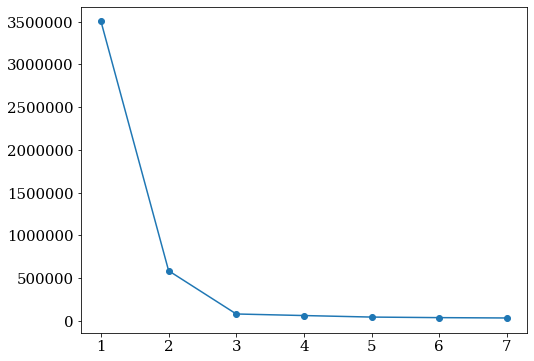

In [ ]:
plt.plot(range(1,8),Distortion,marker='o')

As we see in this example k=3 is a reasonable choice.